# Introduction to Ipython Notebook - PART 3

# Magicking Data with Matplotlib and Numpy

Numpy is a powerful Python module that allows for very fast manipulation of matrices. Since we often reduce complex data sets to matrices, or comma-separated value (csv) files, numpy will be very helpful to us. Treating data through vector manipulation allows for simplified code and programming. Furthermore, numpy accelerates vector computations in comparison to corresponding calculations with Python lists by spending more of the calcuation time in C/C++ (remember Python is an interpretted language).

## Matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. If you are interested in producing elaborate interactive visualizations for the Web, it is likely not the right choice, but for simple bar charts, line charts, and scatterplots, it works pretty well.

In particular, we will be using the **matplotlib.pyplot** module. In its simplest use, pyplot maintains an internal state in which you build up a visualization step by step. Once you’re done, you can save it (with `savefig()`) or display it (with `show()`).

In IPython Notebooks we want to get matplotlib graphics to show up inline. Therefore we should inlcude the command:

> `%matplotlib inline`

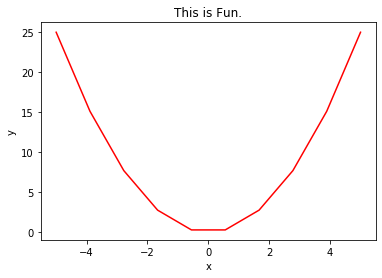

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-5, 5, 10)
y = x ** 2

plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is Fun.')
plt.show()

**`ggplot`** is a Python port of the popular R library ggplot2, which is widely used for creating “publication quality” charts and graphics. It’s probably most interesting if you’re already an avid ggplot2 user, and possibly a little opaque if you’re not.

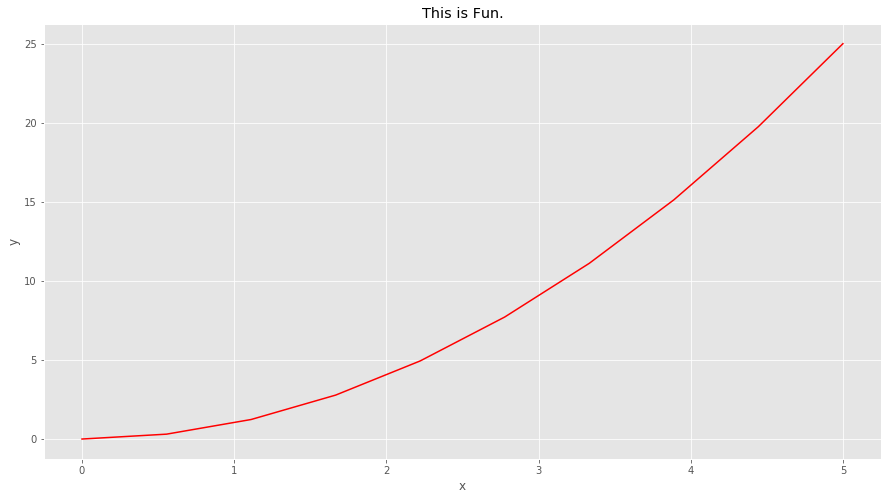

In [2]:
#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is Fun.')
plt.show()

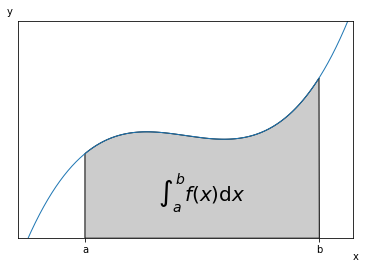

In [5]:
# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()


## An example of subplots

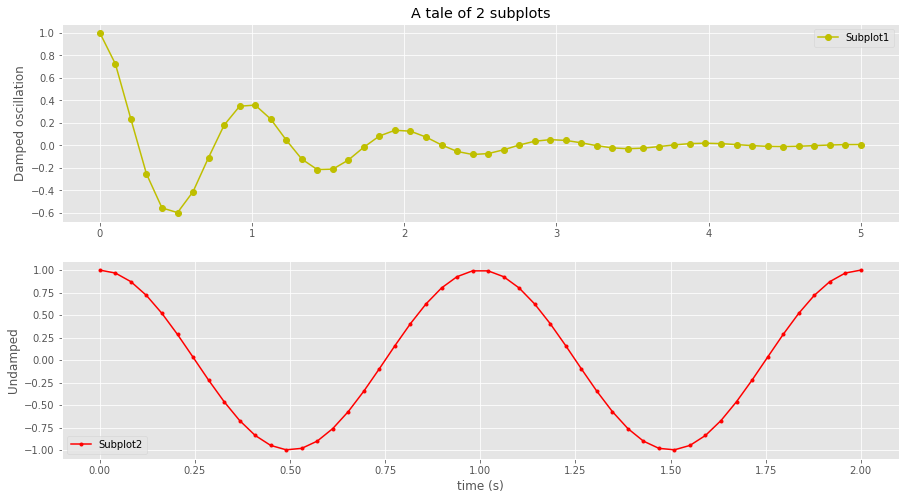

In [4]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# Define there should be subplots, how many, and orientation
plt.subplot(2, 1, 1)

# Notice how different colors and markers can be specified in the plot function.
plt.plot(x1, y1, 'yo-',label="Subplot1")
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-',label="Subplot2")
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.legend()

plt.show()

## Bar Charts

A bar chart is a good choice when you want to show how some quantity varies among some discrete set of items.

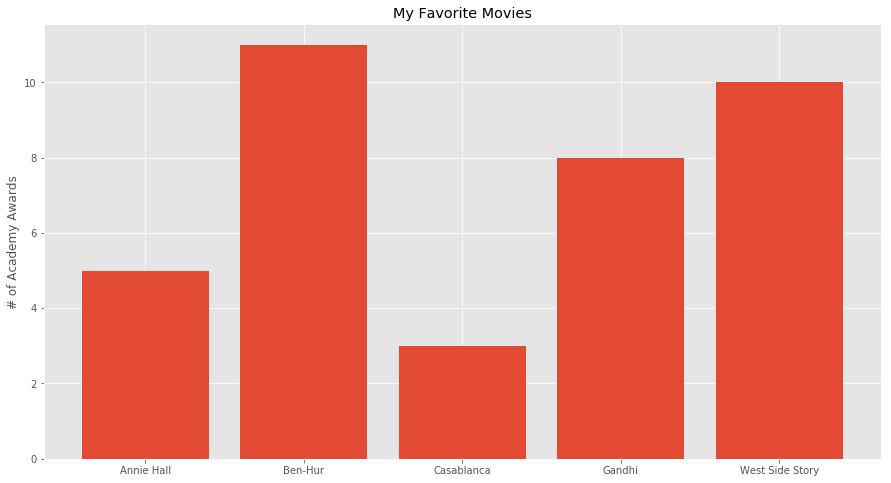

In [7]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates
# so that each bar is centered
xs = [i + 0.1 for i, _ in enumerate(movies)]

# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

# label x-axis with movie names at bar centers
plt.xticks([i + 0.1 for i, _ in enumerate(movies)], movies)
plt.show()

A bar chart can also be a good choice for plotting **histograms** of bucketed numeric values, in order to visually explore how the values are distributed

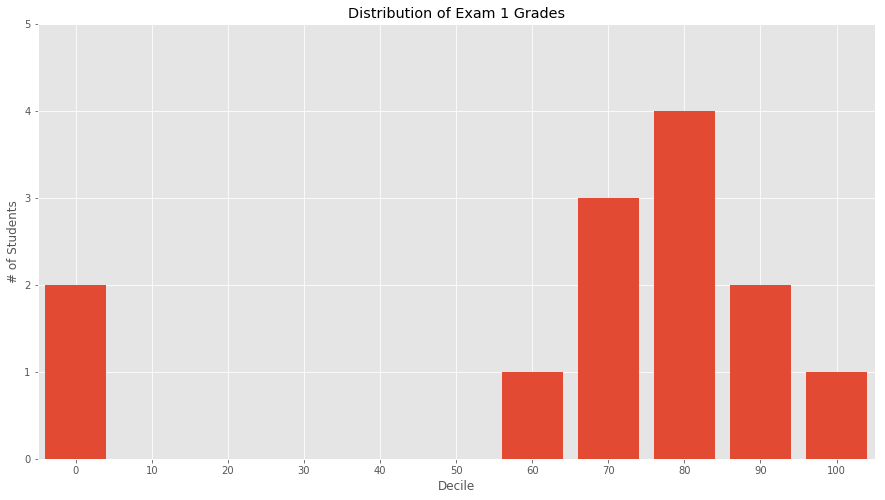

In [8]:
import collections
from collections import Counter

grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x  for x in histogram.keys()],                    # shift each bar to the left by 4
histogram.values(),                                           # give each bar its correct height
8)

plt.axis([-5, 105, 0, 5])                                     # x-axis from -5 to 105,
                                                              # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])                       # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

### One small note before we continue

You may have noticed that in the previous code we used a construct called "lambda". It is an anomymous function (i.e. function that is not bound to a name). It is a very powerful concept that's well integrated into Python. 

This piece of code shows the difference between a normal function definition ("f") and a lambda function ("g"):

In [6]:
def f (x): return x**2
print(f(8))

64


In [7]:
g = lambda x: x**2
print(g(8))

64


As you can see, f() and g() do exactly the same and can be used in the same ways. Note that the lambda definition does not include a "return" statement -- it always contains an expression which is returned. Also note that you can put a lambda definition anywhere a function is expected, and you don't have to assign it to a variable at all.

Another example:

In [6]:
gf = lambda x: 'big' if x > 100 else 'small'
print(gf(112))
print(gf(55))

big
small


## Scatterplots

A scatterplot is the right choice for visualizing the relationship between two paired sets of data. 

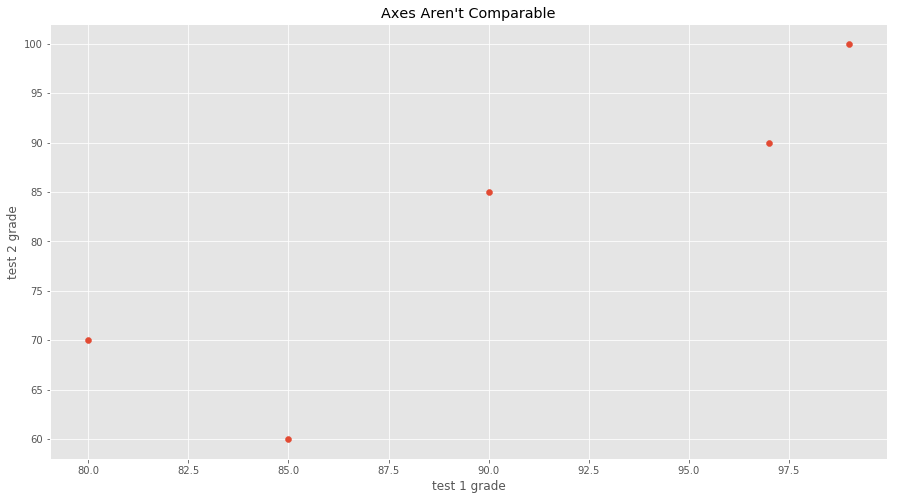

In [206]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)

plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

If you’re scattering comparable variables, you might get a misleading picture if you let matplotlib choose the scale.

If we include a call to `plt.axis("equal")`, the new plot will more accurately show that most of the variation occurs on test 2.

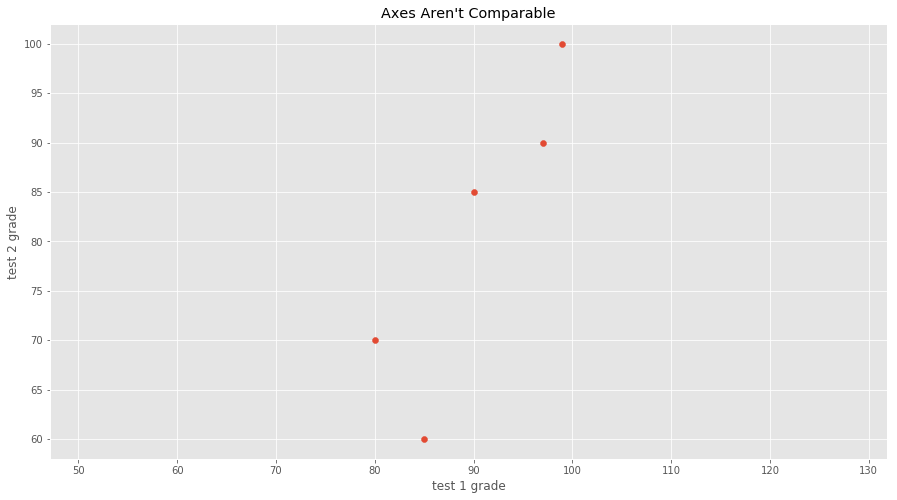

In [207]:
plt.scatter(test_1_grades, test_2_grades)

plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

### Exercises

1a) Generate a list of 1 million random numbers with numpy (you can search how to do it!)

In [40]:
# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)
# generate some integers
values = randint(0, 10, 1000)
print(values)

[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8
 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7
 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7 7 4 9 0 2 0 7 1 7 9 8 4 0
 1 9 8 2 3 1 2 7 2 6 0 9 2 6 6 2 7 7 0 6 5 1 4 6 0 6 5 1 2 1 5 4 0 7 8 9 5
 7 0 9 3 9 1 4 4 6 8 8 9 2 7 5 5 4 5 8 5 8 1 1 8 7 0 3 4 2 0 3 5 1 2 4 3 0
 6 0 7 2 8 3 0 8 4 2 9 0 3 8 1 4 3 3 6 7 3 5 3 2 4 4 0 3 3 8 3 5 6 7 5 1 7
 0 2 8 2 1 4 0 4 1 7 3 1 6 6 9 6 9 6 0 0 2 9 6 0 6 7 0 3 9 0 3 4 7 5 3 8 8
 0 6 7 9 5 4 9 5 2 5 6 6 8 7 7 7 2 6 0 5 2 1 8 5 9 4 9 1 2 0 4 7 0 6 2 4 3
 6 7 6 3 0 6 4 7 6 2 9 5 9 9 9 8 6 4 2 9 4 0 0 3 4 9 3 9 1 2 5 4 0 8 2 3 9
 9 4 4 8 2 1 6 3 8 9 7 0 5 2 2 8 5 0 5 9 8 6 6 0 4 7 3 0 1 6 0 6 1 6 4 2 5
 4 6 2 9 2 7 5 0 7 8 8 8 0 7 2 0 7 1 1 9 5 1 5 9 6 4 9 8 7 5 1 8 0 5 3 9 0
 4 8 6 2 4 3 2 0 0 4 2 5 0 0 3 8 5 3 1 4 7 3 2 2 2 6 6 0 1 5 6 5 8 8 5 5 7
 5 9 1 3 9 3 3 3 6 1 3 0 5 0 5 2 7 6 4 0 2 4 8 7 6 7 7 1 7 7 3 8 3 0 6 3 0
 6 5 9 6 4 6 6 2 2 4 1 2 

1b) Generate a new list of 1 million random numbers using the normal distribution

In [41]:
normalvalues= np.random.normal(size=1000)
print(normalvalues)

[ 5.74622327e-01 -1.51575752e+00 -2.13174614e-01 -5.32298960e-01
  3.42086734e-01 -1.58645873e+00 -1.00732775e+00  2.67764309e+00
  7.18301939e-01 -8.26775273e-02 -5.13677800e-01 -1.24616754e-01
 -4.38768002e-01 -1.58919370e+00  3.68750012e-01 -1.82591438e+00
  3.12024018e-01  1.99916603e-01  3.54441996e-01  1.48443325e+00
 -2.77343001e-01 -1.22587128e+00  2.61803247e+00 -2.15729912e+00
 -1.23954959e+00  1.38052323e-01 -1.27573887e+00  6.67742860e-01
 -3.52650982e-01 -1.08657154e+00 -1.26855934e+00  1.00792598e-02
  1.33428865e+00  2.44715733e-01  3.65815300e-01 -4.83129014e-01
  1.27498447e+00 -1.06158528e+00  1.00192061e+00  4.95379627e-01
  1.86771880e-01  1.17567444e+00 -1.68442095e-02  2.05892183e+00
 -1.38425869e+00  3.79154467e-02  2.75997946e-01  3.17659168e-01
 -2.24200125e-01  1.12809073e-01  2.45028907e+00 -1.82240951e+00
  7.88957013e-01  1.14623602e-01 -5.32781904e-01  1.84200981e-01
 -8.23322868e-02 -1.93819167e+00 -1.71051361e+00 -8.30703209e-01
 -7.30943095e-01 -1.95866

1c) Plot the histogram of both lists above

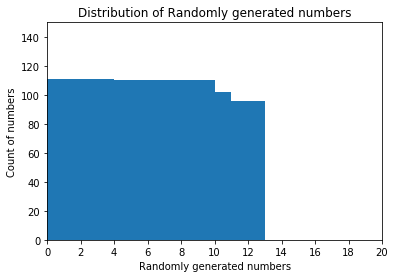

In [43]:
import collections
from collections import Counter


histogram = Counter((value) for value in values)

plt.bar([x  for x in histogram.keys()],                    # shift each bar to the left by 4
histogram.values(),                                           # give each bar its correct height
8)

plt.axis([0, 10, 0, 150])                                     
                                                              

plt.xticks([2 * i for i in range(11)])                       
plt.xlabel("Randomly generated numbers")
plt.ylabel("Count of numbers")
plt.title("Distribution of Randomly generated numbers")
plt.show()
#mumbers are uniformly distributed

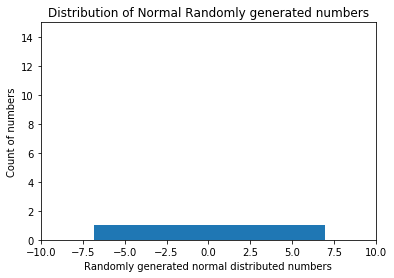

In [44]:
histogram = Counter((normalvalue) for normalvalue in normalvalues)

plt.bar([x  for x in histogram.keys()],                    # shift each bar to the left by 4
histogram.values(),                                           # give each bar its correct height
8)

plt.axis([-10, 10, 0, 15])                                     
                                                              

#plt.xticks(2 * i for i in range(11)])                       
plt.xlabel("Randomly generated normal distributed numbers")
plt.ylabel("Count of numbers")
plt.title("Distribution of Normal Randomly generated numbers")
plt.show()
#mumbers are uniformly distributed

2) Do a scatter plot with the two lists (X axis= list from 1a; Y axis= list from 1b)

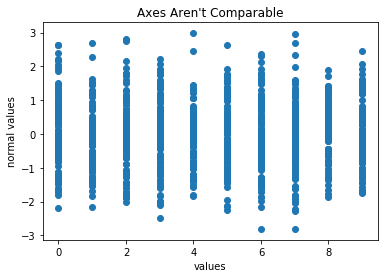

In [46]:
plt.scatter(values, normalvalues)

plt.title("Axes Aren't Comparable")
plt.xlabel("values")
plt.ylabel("normal values")
plt.show()

3) Plot the straight line defined by the function y=2*x+4

In [ ]:
%matplotlib inline

x = np.linspace(-5, 5, 10)
y = x*2 + 4

plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is Fun.')
plt.show()